In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import make_interp_spline

In [55]:
df_ppl = pd.read_csv('../../data/results/july_7_results/scripts_ppl_layers.csv')

In [56]:
df_ppl.head()

,Step,edited_3_scripts_512_8 - ppl,edited_3_scripts_512_8 - ppl__MIN,edited_3_scripts_512_8 - ppl__MAX,edited_3_scripts_512_6 - ppl,edited_3_scripts_512_6 - ppl__MIN,edited_3_scripts_512_6 - ppl__MAX,edited_3_scripts_512_4 - ppl,edited_3_scripts_512_4 - ppl__MIN,edited_3_scripts_512_4 - ppl__MAX,...,normal_scripts_512_8 - ppl__MAX,normal_scripts_512_6 - ppl,normal_scripts_512_6 - ppl__MIN,normal_scripts_512_6 - ppl__MAX,normal_scripts_512_4 - ppl,normal_scripts_512_4 - ppl__MIN,normal_scripts_512_4 - ppl__MAX,normal_scripts_512_2 - ppl,normal_scripts_512_2 - ppl__MIN,normal_scripts_512_2 - ppl__MAX
0,5,160337.755155,160337.755155,160337.755155,203474.863413,203474.863413,203474.863413,207257.325839,207257.325839,207257.325839,...,12284.825804,16862.255733,16862.255733,16862.255733,12954.112376,12954.112376,12954.112376,12885.842116,12885.842116,12885.842116
1,11,10555.797034,10555.797034,10555.797034,12537.078802,12537.078802,12537.078802,11021.756276,11021.756276,11021.756276,...,5366.001141,4702.512365,4702.512365,4702.512365,4034.891865,4034.891865,4034.891865,4294.287079,4294.287079,4294.287079
2,17,4882.744332,4882.744332,4882.744332,3757.845414,3757.845414,3757.845414,3944.225301,3944.225301,3944.225301,...,2784.177434,2961.133478,2961.133478,2961.133478,2394.445925,2394.445925,2394.445925,2467.919640,2467.919640,2467.919640
3,23,3126.142163,3126.142163,3126.142163,3385.853747,3385.853747,3385.853747,3468.465673,3468.465673,3468.465673,...,2115.024798,2057.074450,2057.074450,2057.074450,2497.442505,2497.442505,2497.442505,1588.039035,1588.039035,1588.039035
4,29,2351.288485,2351.288485,2351.288485,2313.671492,2313.671492,2313.671492,2204.554336,2204.554336,2204.554336,...,1785.131942,1768.067266,1768.067266,1768.067266,1935.925588,1935.925588,1935.925588,1137.813357,1137.813357,1137.813357


In [57]:
df_ppl.shape

(50, 25)

In [58]:
# Drop pointless step column
df_ppl = df_ppl.drop('Step', axis=1)

In [59]:
df_ppl

,edited_3_scripts_512_8 - ppl,edited_3_scripts_512_8 - ppl__MIN,edited_3_scripts_512_8 - ppl__MAX,edited_3_scripts_512_6 - ppl,edited_3_scripts_512_6 - ppl__MIN,edited_3_scripts_512_6 - ppl__MAX,edited_3_scripts_512_4 - ppl,edited_3_scripts_512_4 - ppl__MIN,edited_3_scripts_512_4 - ppl__MAX,edited_3_scripts_512_2 - ppl,...,normal_scripts_512_8 - ppl__MAX,normal_scripts_512_6 - ppl,normal_scripts_512_6 - ppl__MIN,normal_scripts_512_6 - ppl__MAX,normal_scripts_512_4 - ppl,normal_scripts_512_4 - ppl__MIN,normal_scripts_512_4 - ppl__MAX,normal_scripts_512_2 - ppl,normal_scripts_512_2 - ppl__MIN,normal_scripts_512_2 - ppl__MAX
0,160337.755155,160337.755155,160337.755155,203474.863413,203474.863413,203474.863413,207257.325839,207257.325839,207257.325839,318779.070665,...,12284.825804,16862.255733,16862.255733,16862.255733,12954.112376,12954.112376,12954.112376,12885.842116,12885.842116,12885.842116
1,10555.797034,10555.797034,10555.797034,12537.078802,12537.078802,12537.078802,11021.756276,11021.756276,11021.756276,12854.073807,...,5366.001141,4702.512365,4702.512365,4702.512365,4034.891865,4034.891865,4034.891865,4294.287079,4294.287079,4294.287079
2,4882.744332,4882.744332,4882.744332,3757.845414,3757.845414,3757.845414,3944.225301,3944.225301,3944.225301,6343.358470,...,2784.177434,2961.133478,2961.133478,2961.133478,2394.445925,2394.445925,2394.445925,2467.919640,2467.919640,2467.919640
3,3126.142163,3126.142163,3126.142163,3385.853747,3385.853747,3385.853747,3468.465673,3468.465673,3468.465673,2687.675983,...,2115.024798,2057.074450,2057.074450,2057.074450,2497.442505,2497.442505,2497.442505,1588.039035,1588.039035,1588.039035
4,2351.288485,2351.288485,2351.288485,2313.671492,2313.671492,2313.671492,2204.554336,2204.554336,2204.554336,1671.676645,...,1785.131942,1768.067266,1768.067266,1768.067266,1935.925588,1935.925588,1935.925588,1137.813357,1137.813357,1137.813357
5,1865.279888,1865.279888,1865.279888,1896.794195,1896.794195,1896.794195,2148.521381,2148.521381,2148.521381,1252.630200,...,1573.118652,1589.279227,1589.279227,1589.279227,1609.934405,1609.934405,1609.934405,933.591249,933.591249,933.591249
6,1501.242740,1501.242740,1501.242740,1794.042802,1794.042802,1794.042802,1538.050225,1538.050225,1538.050225,1176.848985,...,1538.409307,1465.544319,1465.544319,1465.544319,1451.120691,1451.120691,1451.120691,771.712544,771.712544,771.712544
7,1406.840678,1406.840678,1406.840678,1513.878778,1513.878778,1513.878778,1551.096494,1551.096494,1551.096494,869.402393,...,1434.173590,1347.750534,1347.750534,1347.750534,1381.438677,1381.438677,1381.438677,636.966693,636.966693,636.966693
8,1355.339470,1355.339470,1355.339470,1607.030319,1607.030319,1607.030319,1356.981407,1356.981407,1356.981407,755.633977,...,1305.740414,1305.390730,1305.390730,1305.390730,1329.269646,1329.269646,1329.269646,555.272183,555.272183,555.272183
9,1257.460258,1257.460258,1257.460258,1373.187002,1373.187002,1373.187002,1286.429250,1286.429250,1286.429250,575.958456,...,1283.129193,1255.752570,1255.752570,1255.752570,1271.066782,1271.066782,1271.066782,458.450480,458.450480,458.450480


In [60]:
# We want every third column
columns = [x for x in range(0, 96, 3)]
print(columns)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93]


In [61]:
df_ppl = df_ppl.iloc[:, [int(x) for x in range(0, 24, 3)]]

In [62]:
df_ppl.head()

,edited_3_scripts_512_8 - ppl,edited_3_scripts_512_6 - ppl,edited_3_scripts_512_4 - ppl,edited_3_scripts_512_2 - ppl,normal_scripts_512_8 - ppl,normal_scripts_512_6 - ppl,normal_scripts_512_4 - ppl,normal_scripts_512_2 - ppl
0,160337.755155,203474.863413,207257.325839,318779.070665,12284.825804,16862.255733,12954.112376,12885.842116
1,10555.797034,12537.078802,11021.756276,12854.073807,5366.001141,4702.512365,4034.891865,4294.287079
2,4882.744332,3757.845414,3944.225301,6343.358470,2784.177434,2961.133478,2394.445925,2467.919640
3,3126.142163,3385.853747,3468.465673,2687.675983,2115.024798,2057.074450,2497.442505,1588.039035
4,2351.288485,2313.671492,2204.554336,1671.676645,1785.131942,1768.067266,1935.925588,1137.813357


In [63]:
# Time to plot

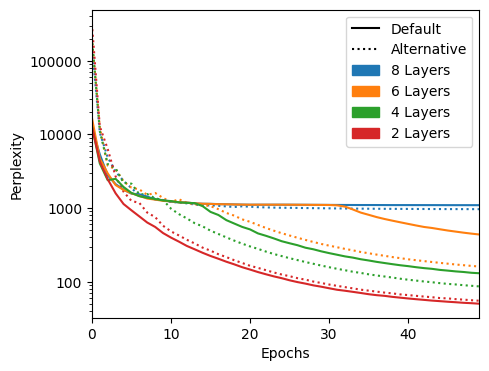

In [64]:
fig, axs = plt.subplots(figsize=(5,4))
df_ppl.plot.line(ax=axs, style={'edited_3_scripts_512_8 - ppl':':C0',
                                'edited_3_scripts_512_6 - ppl':':C1',
                                'edited_3_scripts_512_4 - ppl':':C2',
                                'edited_3_scripts_512_2 - ppl':':C3',
                                'normal_scripts_512_8 - ppl':'C0',
                                'normal_scripts_512_6 - ppl':'C1',
                                'normal_scripts_512_4 - ppl':'C2',
                                'normal_scripts_512_2 - ppl':'C3',})
axs.set_ylabel("Perplexity")
axs.set_xlabel("Epochs")
#axs.set_title("Perplexity for different model sizes on 'Scripts' dataset")
axs.set_xlim(0, 49)
#axs.set_ylim(0, 13)
plt.yscale("log")
axs.yaxis.set_major_formatter(ScalarFormatter())
# Setup custom legend
# Guide: https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
line = Line2D([0], [0], label='Default', linestyle='solid', color='k')
line_2 = Line2D([0], [0], label='Alternative', linestyle='dotted', color='k')
books_2_patch = mpatches.Patch(color='C0', label = '8 Layers')
books_3_patch = mpatches.Patch(color='C1', label = '6 Layers')
books_6_patch = mpatches.Patch(color='C2', label = '4 Layers')
reviews_patch = mpatches.Patch(color='C3', label = '2 Layers')
handles, labels = fig.gca().get_legend_handles_labels()
#handles.extend([books_2_patch])
plt.legend(handles=[line, line_2, books_2_patch, books_3_patch, books_6_patch, reviews_patch])
fig.savefig("../../data/results/july_7_scripts_ppl_sizes.png",bbox_inches='tight')
plt.show()

In [65]:
df_rep = pd.read_csv('../../data/results/july_7_results/scripts_rep_layers.csv')
df_rep = df_rep.drop('Step', axis=1)
df_rep = df_rep.iloc[:, [int(x) for x in range(0, 24, 3)]]

In [66]:
df_rep.head()

,edited_3_scripts_512_8 - repitition,edited_3_scripts_512_6 - repitition,edited_3_scripts_512_4 - repitition,edited_3_scripts_512_2 - repitition,normal_scripts_512_8 - repitition,normal_scripts_512_6 - repitition,normal_scripts_512_4 - repitition,normal_scripts_512_2 - repitition
0,0.490843,0.487658,0.497611,0.523489,0.473145,0.467354,0.473471,0.478031
1,0.484184,0.466652,0.472819,0.486368,0.472385,0.466594,0.476547,0.475353
2,0.447671,0.469888,0.458572,0.487158,0.471516,0.471155,0.469562,0.500516
3,0.447956,0.446173,0.484003,0.478538,0.469526,0.475642,0.470503,0.614658
4,0.464474,0.449350,0.454179,0.576222,0.474629,0.472819,0.471553,0.795404


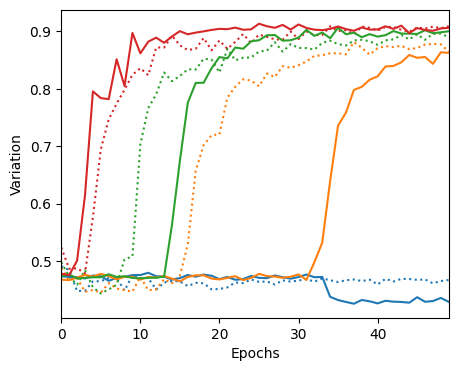

In [67]:
fig, axs = plt.subplots(figsize=(5,4))
df_rep.plot.line(ax=axs, style={'edited_3_scripts_512_8 - repitition':':C0',
                                'edited_3_scripts_512_6 - repitition':':C1',
                                'edited_3_scripts_512_4 - repitition':':C2',
                                'edited_3_scripts_512_2 - repitition':':C3',
                                'normal_scripts_512_8 - repitition':'C0',
                                'normal_scripts_512_6 - repitition':'C1',
                                'normal_scripts_512_4 - repitition':'C2',
                                'normal_scripts_512_2 - repitition':'C3',})
axs.set_ylabel("Variation")
axs.set_xlabel("Epochs")
#axs.set_title("Repitition for different model sizes on 'Scripts' dataset")
axs.set_xlim(0, 49)
#axs.set_ylim(0, 13)
# Setup custom legend
# Guide: https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
"""line = Line2D([0], [0], label='Default', linestyle='solid', color='k')
line_2 = Line2D([0], [0], label='Alternative', linestyle='dotted', color='k')
books_2_patch = mpatches.Patch(color='C0', label = '8 Layers')
books_3_patch = mpatches.Patch(color='C1', label = '6 Layers')
books_6_patch = mpatches.Patch(color='C2', label = '4 Layers')
reviews_patch = mpatches.Patch(color='C3', label = '2 Layers')
handles, labels = fig.gca().get_legend_handles_labels()
#handles.extend([books_2_patch])
plt.legend(handles=[line, line_2, books_2_patch, books_3_patch, books_6_patch, reviews_patch])
"""
axs.get_legend().remove()
fig.savefig("../../data/results/july_7_scripts_rep_sizes.png",bbox_inches='tight')
plt.show()

In [68]:
df_bert = pd.read_csv('../../data/results/july_7_results/scripts_bert_layers.csv')
df_bert = df_bert.drop('Step', axis=1)
df_bert = df_bert.iloc[:, [int(x) for x in range(0, 24, 3)]]

In [69]:
df_bert.head()

,edited_3_scripts_512_8 - system_level_f1_BERT,edited_3_scripts_512_6 - system_level_f1_BERT,edited_3_scripts_512_4 - system_level_f1_BERT,edited_3_scripts_512_2 - system_level_f1_BERT,normal_scripts_512_8 - system_level_f1_BERT,normal_scripts_512_6 - system_level_f1_BERT,normal_scripts_512_4 - system_level_f1_BERT,normal_scripts_512_2 - system_level_f1_BERT
0,-0.267871,-0.245291,-0.276074,-0.275048,-0.273474,-0.289078,-0.267853,-0.288903
1,-0.305118,-0.336778,-0.359011,-0.308245,-0.349439,-0.334448,-0.290909,-0.276902
2,-0.283971,-0.329942,-0.278956,-0.296838,-0.271461,-0.271046,-0.296484,-0.252534
3,-0.303927,-0.263898,-0.281294,-0.289972,-0.304086,-0.281173,-0.289502,-0.224392
4,-0.275045,-0.334919,-0.280716,-0.289746,-0.304262,-0.291960,-0.289788,-0.157248


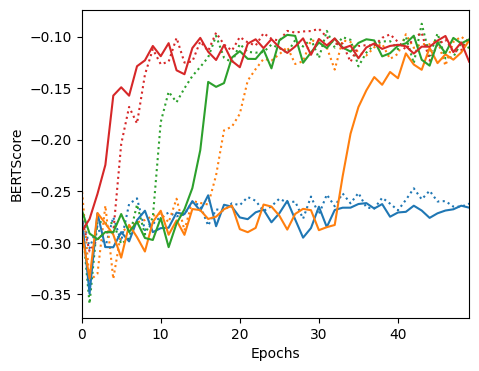

In [70]:
fig, axs = plt.subplots(figsize=(5,4))
df_bert.plot.line(ax=axs, style={'edited_3_scripts_512_8 - system_level_f1_BERT':':C0',
                                'edited_3_scripts_512_6 - system_level_f1_BERT':':C1',
                                'edited_3_scripts_512_4 - system_level_f1_BERT':':C2',
                                'edited_3_scripts_512_2 - system_level_f1_BERT':':C3',
                                'normal_scripts_512_8 - system_level_f1_BERT':'C0',
                                'normal_scripts_512_6 - system_level_f1_BERT':'C1',
                                'normal_scripts_512_4 - system_level_f1_BERT':'C2',
                                'normal_scripts_512_2 - system_level_f1_BERT':'C3',})
axs.set_ylabel("BERTScore")
axs.set_xlabel("Epochs")
#axs.set_title("BERTScore for different model sizes on 'Scripts' dataset")
axs.set_xlim(0, 49)
#axs.set_ylim(0, 13)
# Setup custom legend
# Guide: https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
"""line = Line2D([0], [0], label='Default', linestyle='solid', color='k')
line_2 = Line2D([0], [0], label='Alternative', linestyle='dotted', color='k')
books_2_patch = mpatches.Patch(color='C0', label = '8 Layers')
books_3_patch = mpatches.Patch(color='C1', label = '6 Layers')
books_6_patch = mpatches.Patch(color='C2', label = '4 Layers')
reviews_patch = mpatches.Patch(color='C3', label = '2 Layers')
handles, labels = fig.gca().get_legend_handles_labels()
#handles.extend([books_2_patch])
plt.legend(handles=[line, line_2, books_2_patch, books_3_patch, books_6_patch, reviews_patch])
"""
axs.get_legend().remove()
fig.savefig("../../data/results/july_7_scripts_bert_sizes.png",bbox_inches='tight')
plt.show()

Combine into one plot

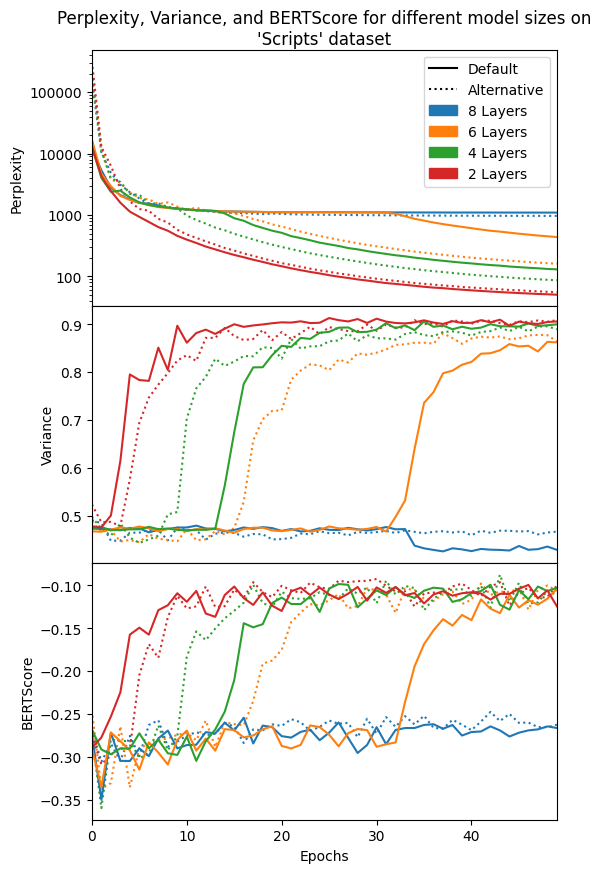

In [71]:
fig = plt.figure(figsize=(6,10))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

"""df_ppl.plot.line(ax=axs, style={'edited_3_scripts_512_8 - ppl':':C0',
                                'edited_3_scripts_512_6 - ppl':':C1',
                                'edited_3_scripts_512_4 - ppl':':C2',
                                'edited_3_scripts_512_2 - ppl':':C3',
                                'normal_scripts_512_8 - ppl':'C0',
                                'normal_scripts_512_6 - ppl':'C1',
                                'normal_scripts_512_4 - ppl':'C2',
                                'normal_scripts_512_2 - ppl':'C3',})"""
axs[0].plot(df_ppl['edited_3_scripts_512_8 - ppl'], color='C0', linestyle=':')
axs[0].plot(df_ppl['edited_3_scripts_512_6 - ppl'], color='C1', linestyle=':')
axs[0].plot(df_ppl['edited_3_scripts_512_4 - ppl'], color='C2', linestyle=':')
axs[0].plot(df_ppl['edited_3_scripts_512_2 - ppl'], color='C3', linestyle=':')
axs[0].plot(df_ppl['normal_scripts_512_8 - ppl'], color='C0', linestyle='-')
axs[0].plot(df_ppl['normal_scripts_512_6 - ppl'], color='C1', linestyle='-')
axs[0].plot(df_ppl['normal_scripts_512_4 - ppl'], color='C2', linestyle='-')
axs[0].plot(df_ppl['normal_scripts_512_2 - ppl'], color='C3', linestyle='-')
axs[0].set_xlim(0, 49)
axs[0].set_yscale("log")
axs[0].yaxis.set_major_formatter(ScalarFormatter())
axs[0].set_ylabel("Perplexity")

"""df_rep.plot.line(ax=axs, style={'edited_3_scripts_512_8 - repitition':':C0',
                                'edited_3_scripts_512_6 - repitition':':C1',
                                'edited_3_scripts_512_4 - repitition':':C2',
                                'edited_3_scripts_512_2 - repitition':':C3',
                                'normal_scripts_512_8 - repitition':'C0',
                                'normal_scripts_512_6 - repitition':'C1',
                                'normal_scripts_512_4 - repitition':'C2',
                                'normal_scripts_512_2 - repitition':'C3',})"""
axs[1].plot(df_rep['edited_3_scripts_512_8 - repitition'], color='C0', linestyle=':')
axs[1].plot(df_rep['edited_3_scripts_512_6 - repitition'], color='C1', linestyle=':')
axs[1].plot(df_rep['edited_3_scripts_512_4 - repitition'], color='C2', linestyle=':')
axs[1].plot(df_rep['edited_3_scripts_512_2 - repitition'], color='C3', linestyle=':')
axs[1].plot(df_rep['normal_scripts_512_8 - repitition'], color='C0', linestyle='-')
axs[1].plot(df_rep['normal_scripts_512_6 - repitition'], color='C1', linestyle='-')
axs[1].plot(df_rep['normal_scripts_512_4 - repitition'], color='C2', linestyle='-')
axs[1].plot(df_rep['normal_scripts_512_2 - repitition'], color='C3', linestyle='-')
axs[1].set_xlim(0, 49)
axs[1].set_ylabel("Variance")

"""df_bert.plot.line(ax=axs, style={'edited_3_scripts_512_8 - system_level_f1_BERT':':C0',
                                'edited_3_scripts_512_6 - system_level_f1_BERT':':C1',
                                'edited_3_scripts_512_4 - system_level_f1_BERT':':C2',
                                'edited_3_scripts_512_2 - system_level_f1_BERT':':C3',
                                'normal_scripts_512_8 - system_level_f1_BERT':'C0',
                                'normal_scripts_512_6 - system_level_f1_BERT':'C1',
                                'normal_scripts_512_4 - system_level_f1_BERT':'C2',
                                'normal_scripts_512_2 - system_level_f1_BERT':'C3',})"""
axs[2].plot(df_bert['edited_3_scripts_512_8 - system_level_f1_BERT'], color='C0', linestyle=':')
axs[2].plot(df_bert['edited_3_scripts_512_6 - system_level_f1_BERT'], color='C1', linestyle=':')
axs[2].plot(df_bert['edited_3_scripts_512_4 - system_level_f1_BERT'], color='C2', linestyle=':')
axs[2].plot(df_bert['edited_3_scripts_512_2 - system_level_f1_BERT'], color='C3', linestyle=':')
axs[2].plot(df_bert['normal_scripts_512_8 - system_level_f1_BERT'], color='C0', linestyle='-')
axs[2].plot(df_bert['normal_scripts_512_6 - system_level_f1_BERT'], color='C1', linestyle='-')
axs[2].plot(df_bert['normal_scripts_512_4 - system_level_f1_BERT'], color='C2', linestyle='-')
axs[2].plot(df_bert['normal_scripts_512_2 - system_level_f1_BERT'], color='C3', linestyle='-')
axs[2].set_xlim(0, 49)
axs[2].set_ylabel("BERTScore")
axs[2].set_xlabel("Epochs")

line = Line2D([0], [0], label='Default', linestyle='solid', color='k')
line_2 = Line2D([0], [0], label='Alternative', linestyle='dotted', color='k')
books_2_patch = mpatches.Patch(color='C0', label = '8 Layers')
books_3_patch = mpatches.Patch(color='C1', label = '6 Layers')
books_6_patch = mpatches.Patch(color='C2', label = '4 Layers')
reviews_patch = mpatches.Patch(color='C3', label = '2 Layers')
handles, labels = fig.gca().get_legend_handles_labels()
#handles.extend([books_2_patch])
axs[0].legend(handles=[line, line_2, books_2_patch, books_3_patch, books_6_patch, reviews_patch])
axs[0].set_title("Perplexity, Variance, and BERTScore for different model sizes on 'Scripts' dataset", wrap=True)
fig.savefig("../../data/results/july_7_scripts_sizes_full.png",bbox_inches='tight')
plt.show()